# 5. 컨볼루션 신경망(CNN)
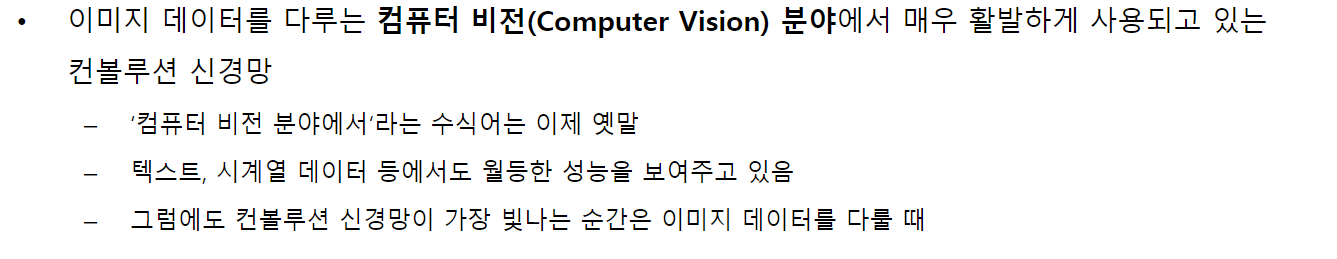

## 5.1 컨볼루션 신경망 실습
- p.132~

### 데이터 살펴보기

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
np.shape(x_train), np.shape(y_train)

((60000, 28, 28), (60000,))

In [4]:
# 피쳐 스케일링
# 0 ~ 1 범위로 만듭니다.
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

In [5]:
print(np.shape(x_train), np.shape(y_train))
print(np.max(x_train), np.min(x_train)) # 스케일링을 해서 0(검)~1(흰)사이의 값이 나옴.
print(np.max(x_test), np.min(x_test))

(60000, 28, 28, 1) (60000,)
1.0 0.0
1.0 0.0


In [7]:
# 정답(타켓) 레이블링
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train[0])
print(class_names[np.argmax(y_train[0])])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Ankle boot


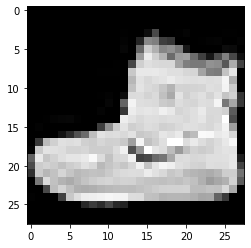

In [8]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

In [10]:
# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

### 모델 구성하기
- 모델은 Conv2D, MaxPool2D, Dense 층으로 구성   
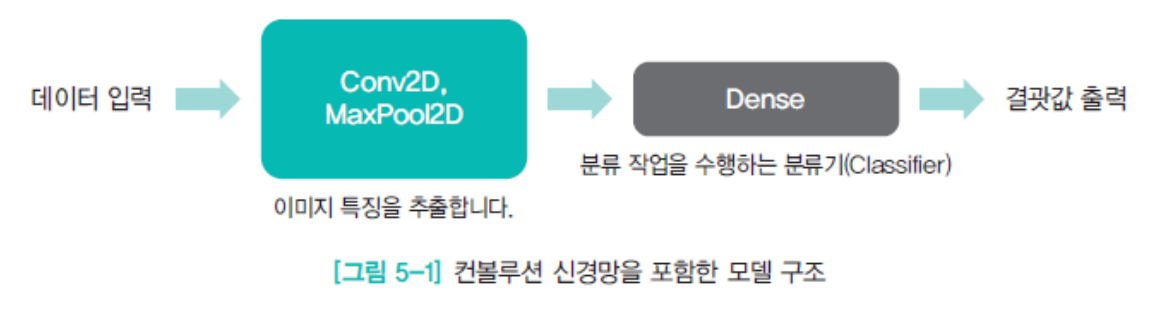

- equential()에 리스트 형태로 층을 제공하여 모델을 구성할 수 있음   
  - 해당교제에서는 add()를 주로 사용

In [11]:
x_train.shape[1:]

(28, 28, 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# 이전과 다르게 리스트 형태로 층을 구성해볼 수 있습니다.
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), 
           padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),  
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    
    Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
])

### 모델 학습하기

In [17]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 32, 
                    validation_data = (x_val, y_val))

Epoch 1/30
1313/1313 [==============================] - 40s 8ms/step - loss: 0.5168 - acc: 0.8132 - val_loss: 0.3913 - val_acc: 0.8589
Epoch 2/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3256 - acc: 0.8823 - val_loss: 0.2990 - val_acc: 0.8933
Epoch 3/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2798 - acc: 0.8980 - val_loss: 0.2721 - val_acc: 0.9028
Epoch 4/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2485 - acc: 0.9087 - val_loss: 0.2734 - val_acc: 0.9030
Epoch 5/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2267 - acc: 0.9168 - val_loss: 0.2494 - val_acc: 0.9112
Epoch 6/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2052 - acc: 0.9244 - val_loss: 0.2385 - val_acc: 0.9154
Epoch 7/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1889 - acc: 0.9311 - val_loss: 0.2509 - val_acc: 0.9096
Epoch 8/30
1313/1313 [==============================] - 

### 모델 구조 확인

In [13]:
model.summary() # 모델의 구조를 확인합니다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

#### plot_model 함수를 사용

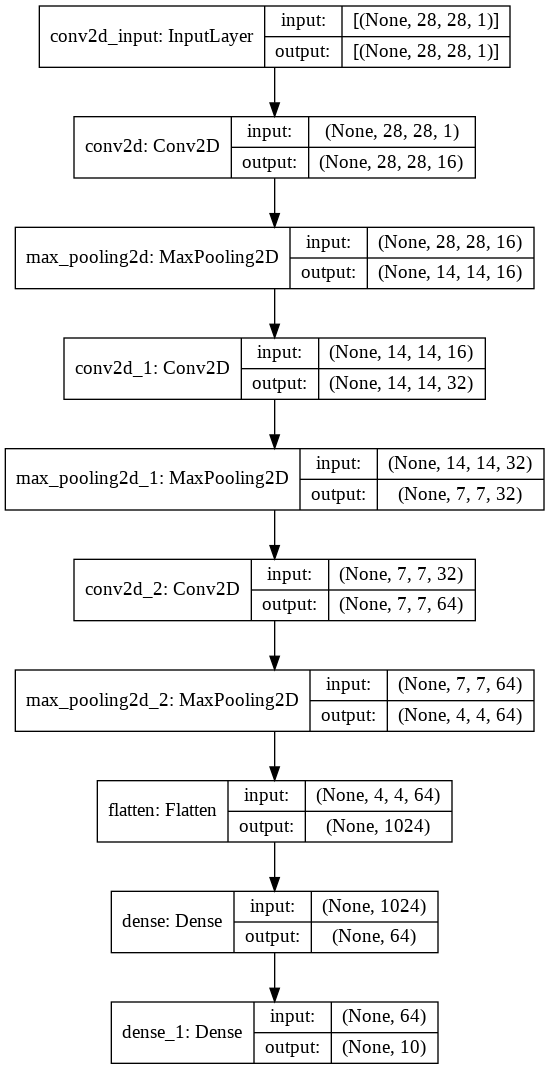

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)

### 모델 평가 및 시각화

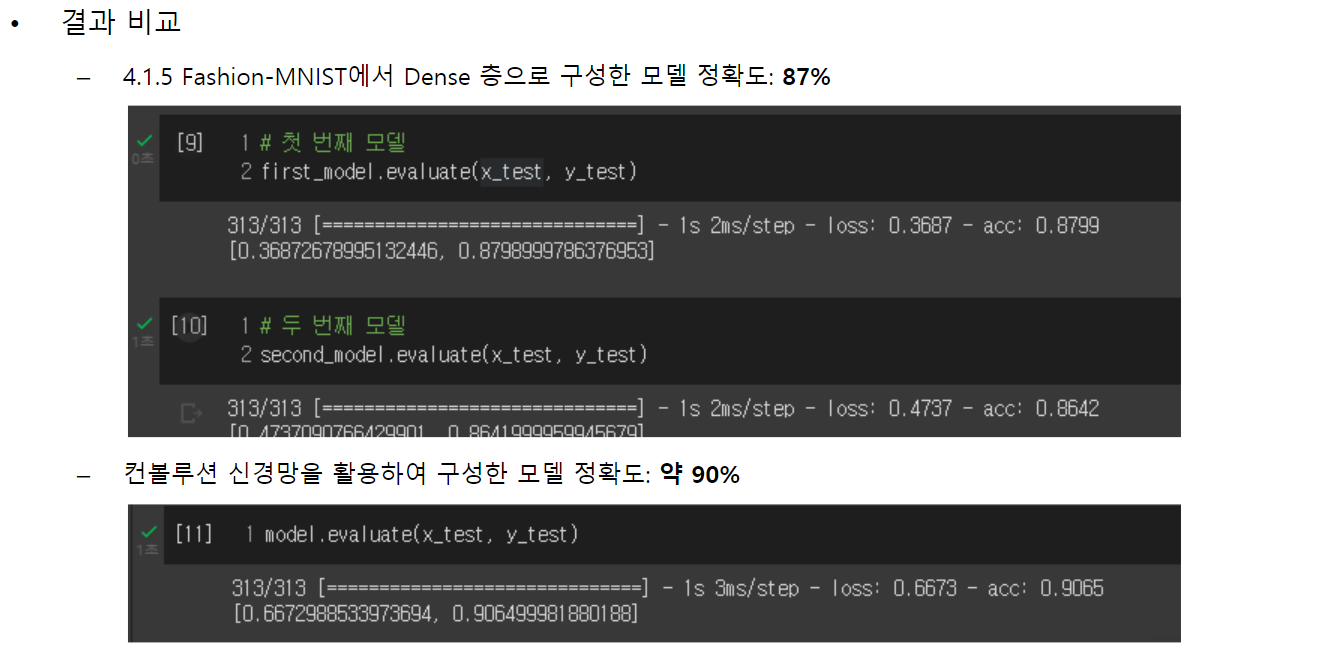

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6673 - acc: 0.9065


[0.6672988533973694, 0.906499981880188]

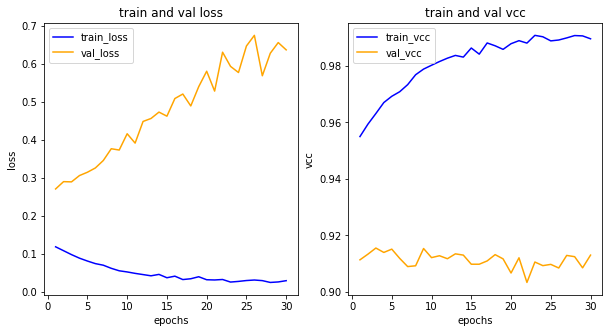

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_vcc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_vcc')
ax2.set_title('train and val vcc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('vcc')
ax2.legend()

plt.show()

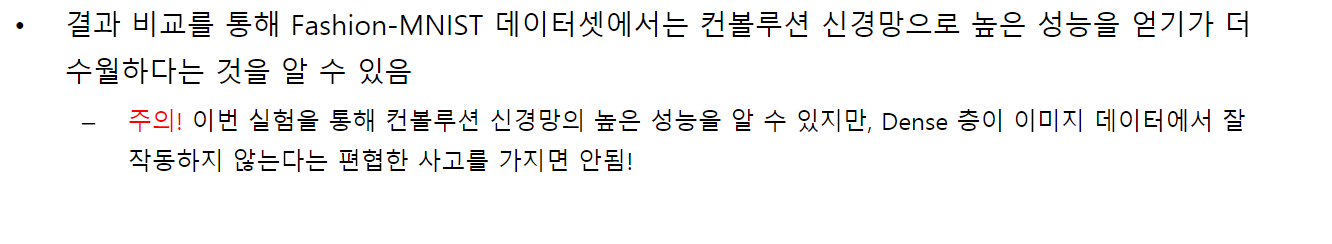